# Sara Khosravi_Star Type

###############################################################################################################################

Dataset Info:
------------------
This is a dataset consisting of several features of stars.

Some of them are:

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Spectral Class (O,B,A,F,G,K,,M)
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

Purpose:
------------
The purpose of making the dataset is to prove that the stars follows a certain graph in the celestial Space ,
specifically called Hertzsprung-Russell Diagram or simply HR-Diagram
so that we can classify stars by plotting its features based on that graph.

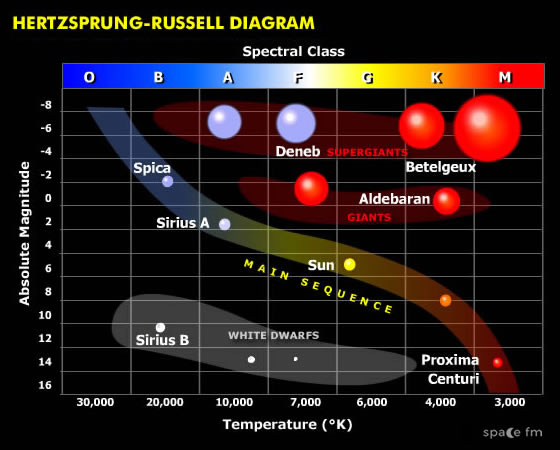

Data Collection and Preparation techniques:
---------------------------------------------------------------
The dataset is created based on several equations in astrophysics. They are given below:

Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star)
Wienn's Displacement law (for finding surface temperature of a star using wavelength)
Absolute magnitude relation
Radius of a star using parallax .
The dataset took 3 weeks to collect for 240 stars which are mostly collected from web.
The missing data were manually calculated using those equations of astrophysics given above.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
!pip install yellowbrick
#import libraries from sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
import os
os.chdir(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data')
os.getcwd()

'C:\\Sara\\Data SCIENCE\\Machine Learning\\Project\\Data'

## DATA COLLECTION
##############################################################################################################################

In [2]:
#import the dataset
data = pd.read_csv(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data\6 class csv.csv')
data.shape

(240, 7)

In [3]:
data.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
data.tail(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
#making a copy of data before preprocessing
data_raw=data.copy()

In [7]:
#pandas_profiling.ProfileReport(data)

In [8]:
#The statistical summary of the dataset
data.describe()# for numeric columns
pd.options.display.float_format = "{:.2f}".format
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.00,10497.46,9552.43,1939.00,3344.25,5776.00,15055.50,40000.00
Luminosity(L/Lo),240.00,107188.36,179432.24,0.00,0.00,0.07,198050.00,849420.00
Radius(R/Ro),240.00,237.16,517.16,0.01,0.10,0.76,42.75,1948.50
Absolute magnitude(Mv),240.00,4.38,10.53,-11.92,-6.23,8.31,13.70,20.06
Star type,240.00,2.50,1.71,0.00,1.00,2.50,4.00,5.00


In [9]:
#finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)
data.astype('object').describe().transpose()

,count,unique,top,freq
Temperature (K),240,228,3600,3
Luminosity(L/Lo),240.00,208.00,200000.00,5.00
Radius(R/Ro),240.00,216.00,0.11,3.00
Absolute magnitude(Mv),240.00,228.00,12.23,3.00
Star type,240,6,5,40
Star color,240,19,Red,112
Spectral Class,240,7,M,111


## Data Preprocessing 
############################################################################################################################

In [10]:
#drop duplicate
data=data.drop_duplicates()

In [11]:
#Count missing values for each column of the dataframe df By default (axis = 0)
data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [12]:
#Feature Encoding
data = {
    'temperature': data['Temperature (K)'],
    'luminosity': data['Luminosity(L/Lo)'],
    'radius': data['Radius(R/Ro)'],
    'absolute_magnitude': data['Absolute magnitude(Mv)'],
    'star_type': data['Star type'],
    'star_color': data['Star color'],
    'spectral_class': data['Spectral Class']
}
data = pd.DataFrame.from_dict(data)
data['star_type'] = data['star_type'].astype('category').cat.codes
data['star_color'] = data['star_color'].astype('category').cat.codes
data['spectral_class'] = data['spectral_class'].astype('category').cat.codes


In [13]:
#Check Data after Feature Encoding
data.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.00,0.17,16.12,0,10,5
1,3042,0.00,0.15,16.60,0,10,5
2,2600,0.00,0.10,18.70,0,10,5
3,2800,0.00,0.16,16.65,0,10,5
4,1939,0.00,0.10,20.06,0,10,5


## Exploratory Analysis 
###########################################################################################################################

In [14]:
#Shuffling Data
data = data.sample(frac=1, random_state=0)

In [15]:
#Choose Target
X=data.drop('star_type', axis=1)
y=data['star_type'].values

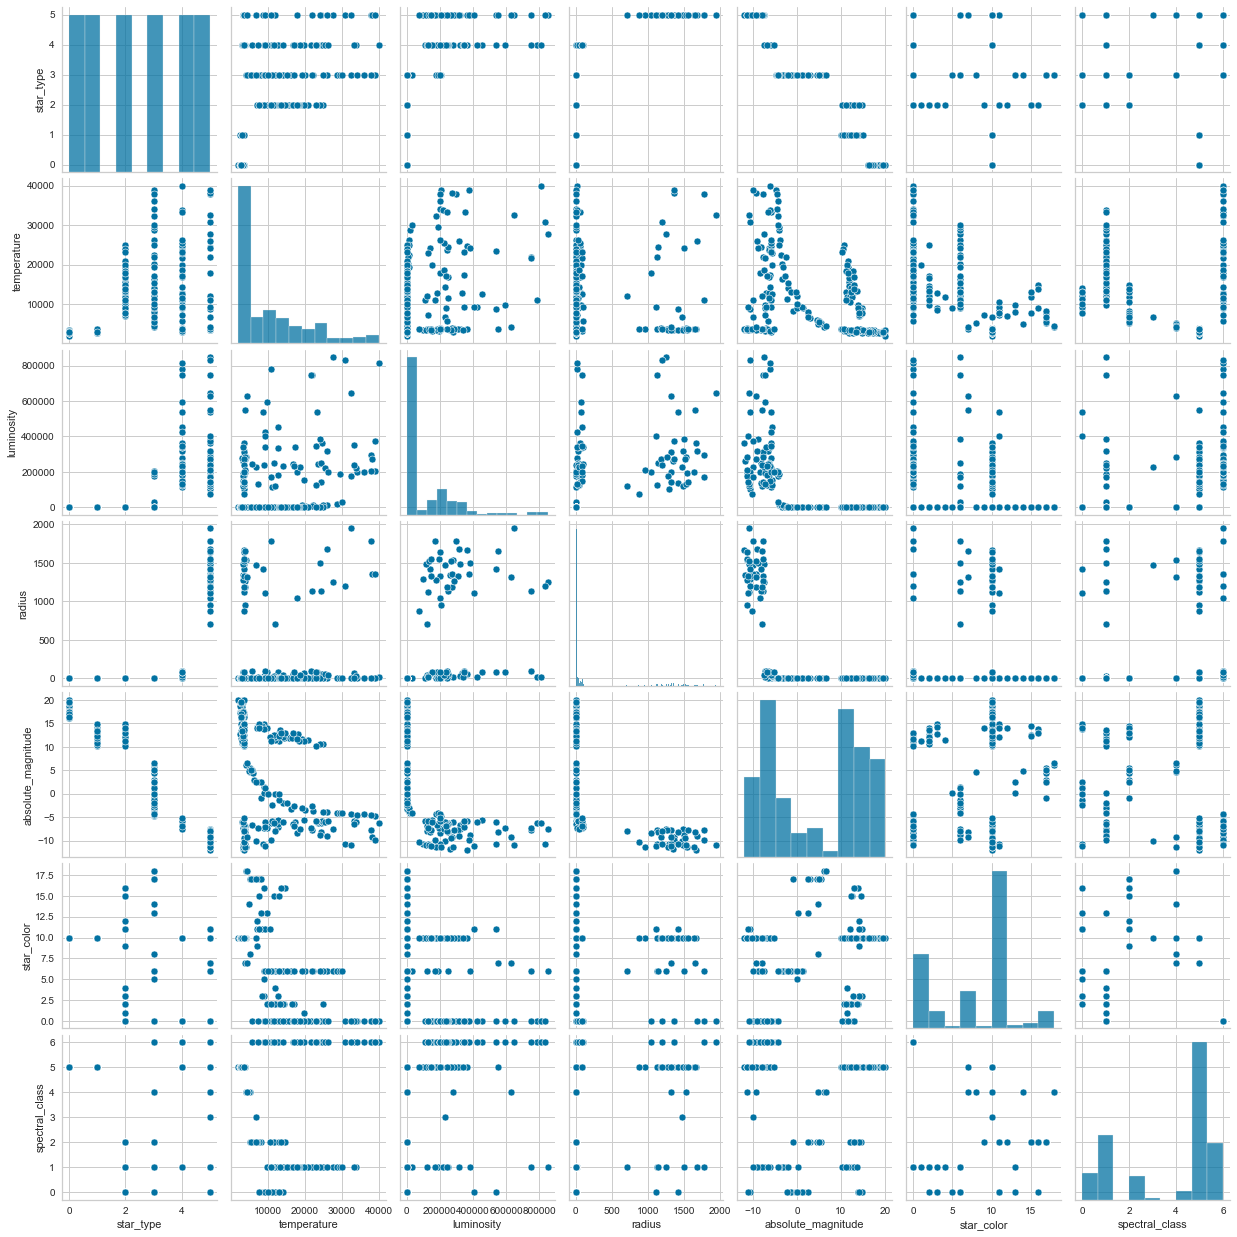

In [16]:
# Pairplot of all the numeric variables
sns.pairplot(data, vars=['star_type','temperature','luminosity','radius','absolute_magnitude','star_color','spectral_class'])
plt.show()

- Correlation and heatmap is used for NUMERICAL VARIABLE , therefore when we want to use that in Logestic Regression, we must drop TARGET in heat map and correlation

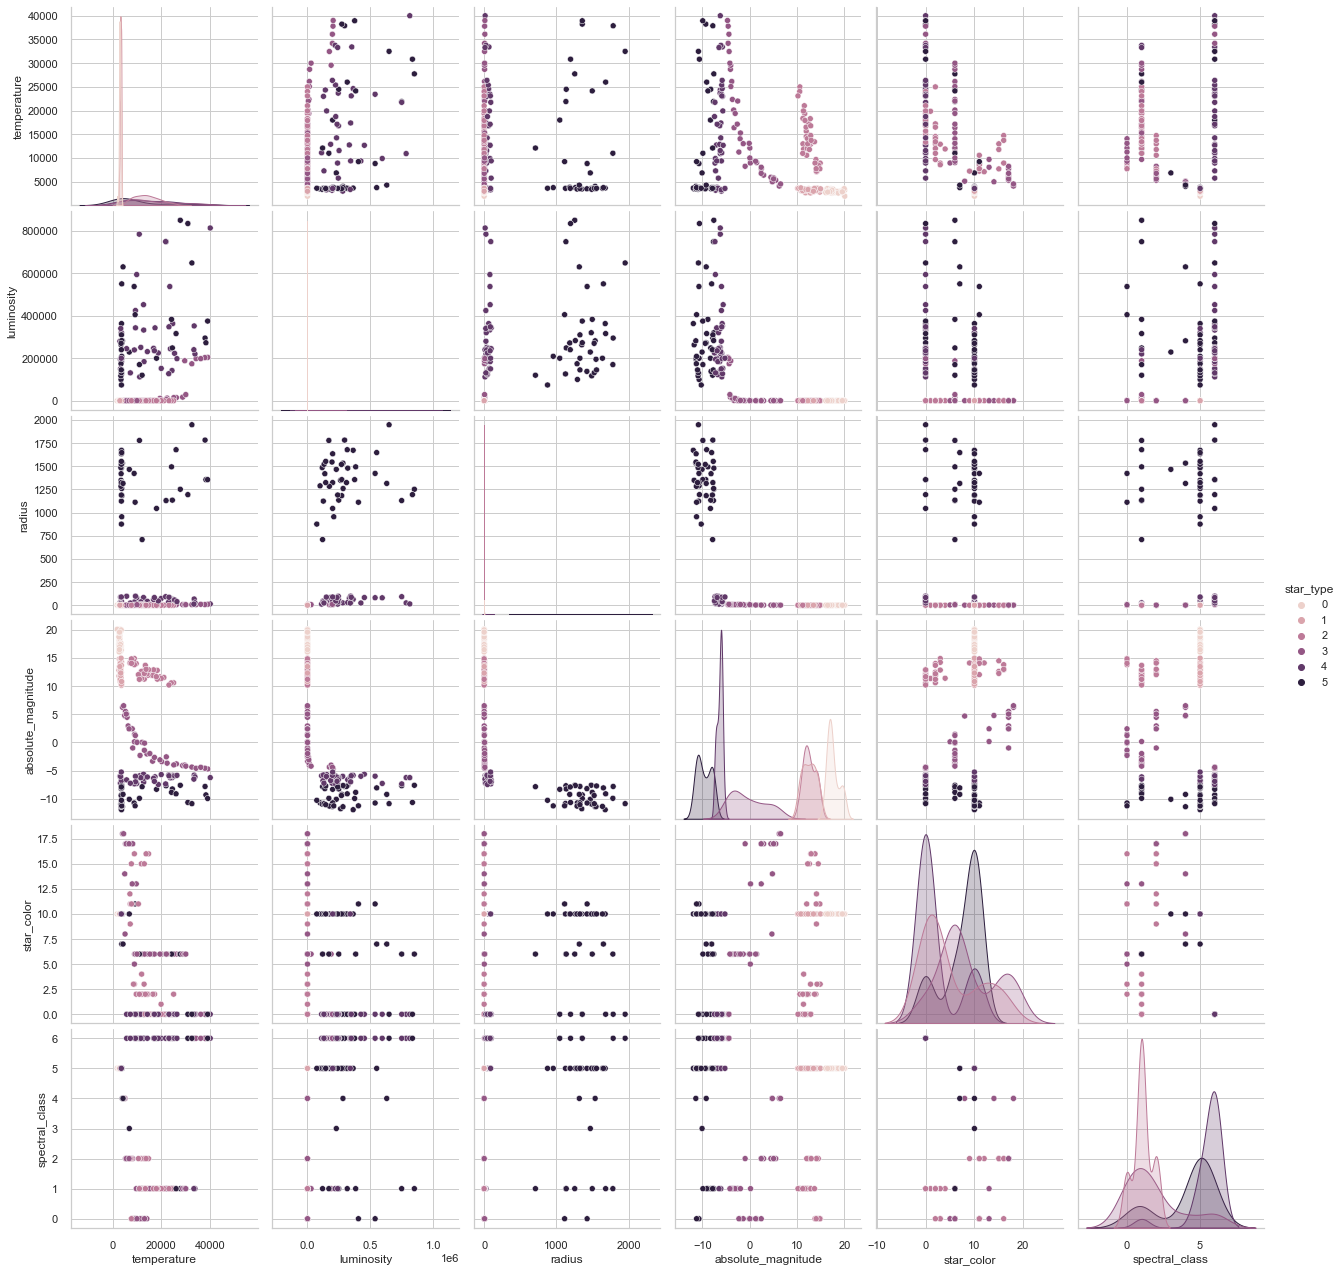

In [74]:
# Pairplot 
sns.set_style("whitegrid");
sns.pairplot(data, hue="star_type", size=3);
plt.show()

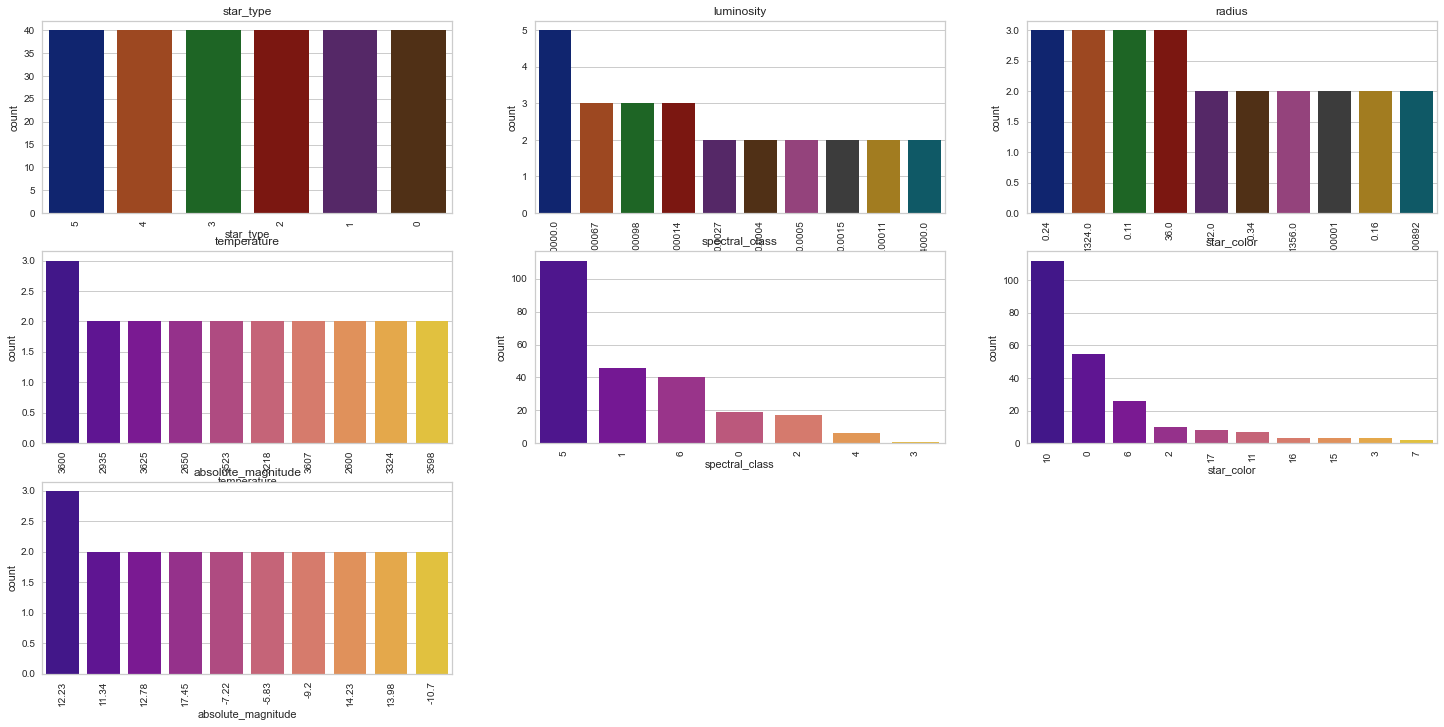

In [17]:
#Frequency Distribution
plt.rcParams['figure.figsize']= 25,12

plt.subplot(331)
sns.countplot(data['star_type'],
             order=data['star_type'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('star_type')

plt.subplot(332)
sns.countplot(data['luminosity'],
             order=data['luminosity'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('luminosity')

plt.subplot(333)
sns.countplot(data['radius'],
             order=data['radius'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('radius')

plt.subplot(334)
sns.countplot(data['temperature'],
             order=data['temperature'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('temperature')

plt.subplot(335)
sns.countplot(data['spectral_class'],
             order=data['spectral_class'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('spectral_class')

plt.subplot(336)
sns.countplot(data['star_color'],
             order=data['star_color'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('star_color')

plt.subplot(337)
sns.countplot(data['absolute_magnitude'],
             order=data['absolute_magnitude'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('absolute_magnitude')

plt.show()

By using visulaization for see the VALUE_COUNT, we can observe the label of graph are very messy, therefore we need to deep in mechine learning.

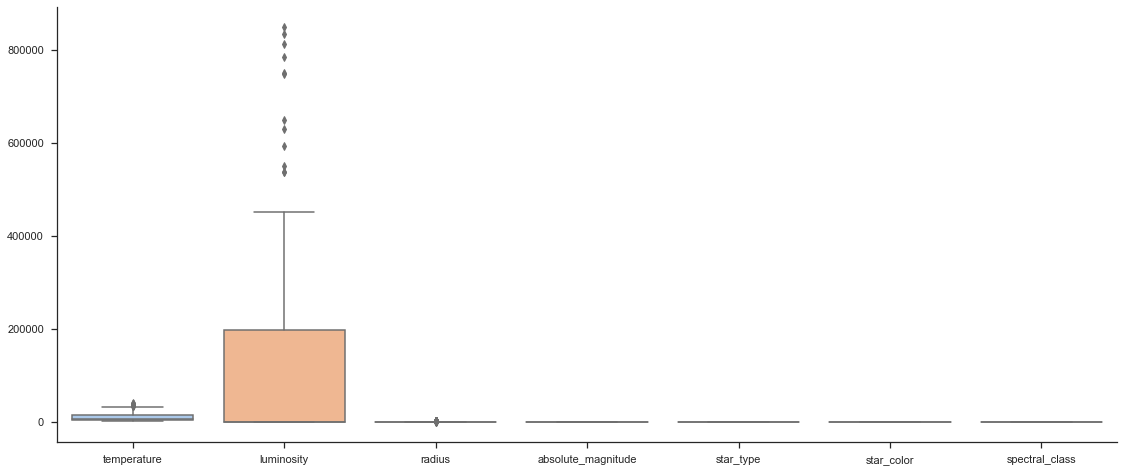

In [18]:
# Finding outliers by using BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=data)
sns.despine()

In [19]:
#Standardizing All the Columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X=pd.DataFrame(scaled, columns=X.columns)

## Data Handling - Predictive / Supervised Learning
############################################################################################################################

In [20]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
#Macro to calculate 
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "pre_macro", "recall_macro", "f1_macro", "f1_macro_manual"]

def evaluate(true, predicted):
    pre_macro = metrics.precision_score(true, predicted, average="macro")
    recall_macro = metrics.recall_score(true, predicted, average="macro")
    f1_macro = metrics.f1_score(true, predicted, average="macro")
    f1_score_raw = metrics.f1_score(true, predicted, average=None)
    f1_macro_manual = f1_score_raw.mean()
    return pre_macro, recall_macro, f1_macro, f1_macro_manual

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test,pred_knn)

In [23]:
print('confusion_matrix KNN      :\n', metrics.confusion_matrix(y_test, pred_knn))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN :\n',metrics.classification_report(y_test, pred_knn))

confusion_matrix KNN      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [24]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log = log_reg.predict(X_test)
score_log = accuracy_score(y_test,pred_log)

In [25]:
print('confusion_matrix LogisticRegression      :\n', metrics.confusion_matrix(y_test, pred_log))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogisticRegression :\n',metrics.classification_report(y_test, pred_log))

confusion_matrix LogisticRegression      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  6  2  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogisticRegression :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      0.75      0.86         8
           4       0.71      1.00      0.83         5
           5       1.00      1.00      1.00        10

    accuracy                           0.97        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.98      0.97      0.97        60



In [26]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test,pred_svc)

In [27]:
print('confusion_matrix SVC      :\n', metrics.confusion_matrix(y_test, pred_svc))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC :\n',metrics.classification_report(y_test, pred_svc))

confusion_matrix SVC      :
 [[13  0  0  0  0  0]
 [ 1 12  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  6  2  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report SVC :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        11
           3       1.00      0.75      0.86         8
           4       0.71      1.00      0.83         5
           5       1.00      1.00      1.00        10

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.96      0.95      0.95        60



In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test,pred_rfc)

In [29]:
print('confusion_matrix RandomForest      :\n', metrics.confusion_matrix(y_test, pred_rfc))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest :\n',metrics.classification_report(y_test, pred_rfc))

confusion_matrix RandomForest      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report RandomForest :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [30]:
adab = AdaBoostClassifier()
adab.fit(X_train,y_train)
pred_adab = adab.predict(X_test)
score_adab = accuracy_score(y_test,pred_adab)

In [31]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_adab))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_adab))

confusion_matrix AdaBoost      :
 [[13  0  0  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        13
           2       1.00      1.00      1.00        11
           3       0.38      1.00      0.55         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           0.78        60
   macro avg       0.73      0.83      0.76        60
weighted avg       0.70      0.78      0.72        60



## Regularization and Optimization all Models
###############################################################################################################################

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_knn=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_s = knn.predict(X_test)
    scores = accuracy_score(y_test,pred_s)
    list_knn.append(scores)

In [33]:
print(max(list_knn))

1.0


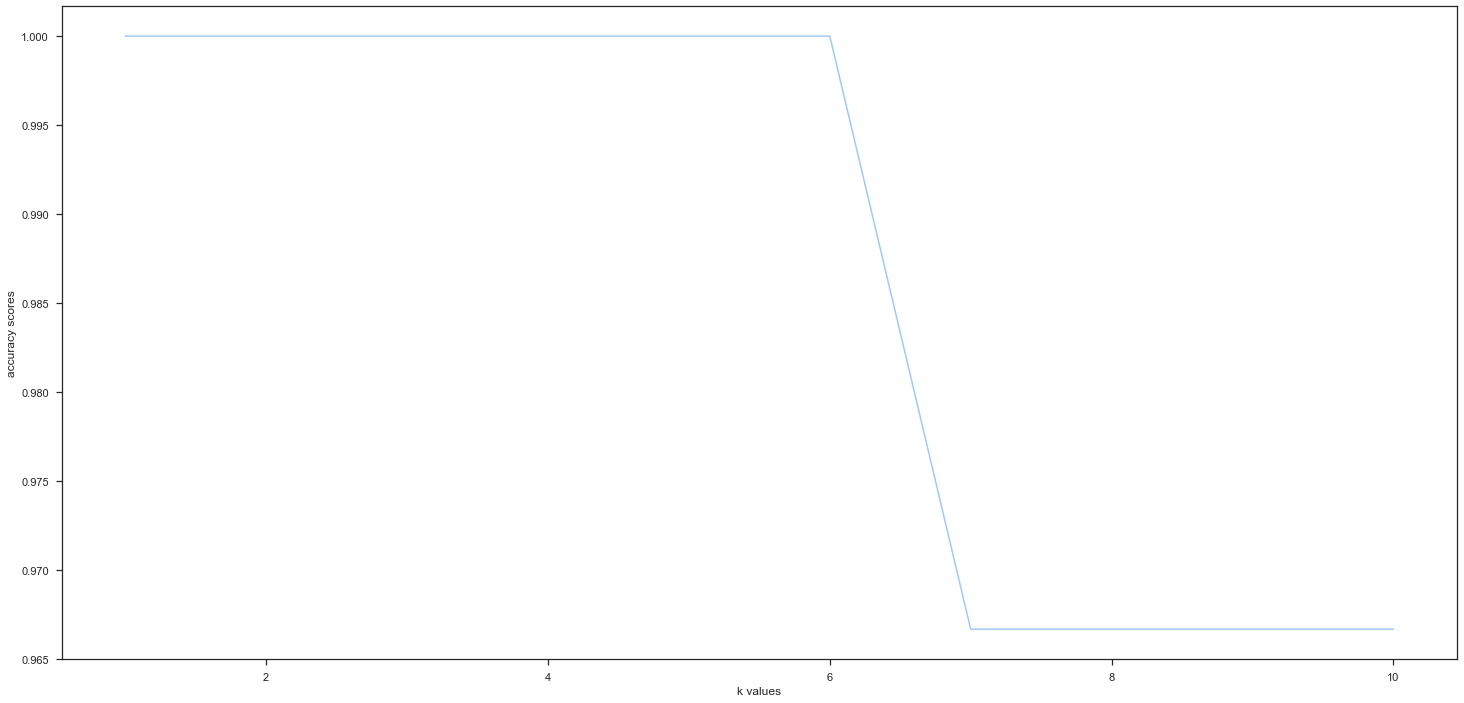

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_knn)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [35]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [3,5,10],
              'weights': ['uniform']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 3)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10], 'weights': ['uniform']})

In [36]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_knn_g = grid_model.best_estimator_.predict(X_test)
print(pred_knn_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 3, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9499999999999998
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 3 4 5 4 1 4 3 1 2]
[0 3 4 5 4 1 4 3 1 2]


In [37]:
print('confusion_matrix KNN_opt     :\n', metrics.confusion_matrix(y_test, pred_knn_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN_opt :\n',metrics.classification_report(y_test, pred_knn_g))

confusion_matrix KNN_opt     :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [38]:
lclassifier = SGDClassifier(loss='hinge',learning_rate='optimal', eta0=0.01, penalty='l2')

In [39]:
#compare that k-fold scores
print("linear regression's 10-fold score:",cross_val_score(lclassifier, X, y, cv=5).mean())

linear regression's 10-fold score: 0.9416666666666667


In [40]:
#Gradient descent can used in different models that have a loss function
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'penalty':['l2'],
            'alpha': [0.1],
            'l1_ratio':[1],
            'learning_rate':['optimal'],
            'eta0':[0.001],
            'power_t':[0.01]
         }
grid_model2 = GridSearchCV(SGDClassifier(random_state=7), params, cv=4)
grid_model2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SGDClassifier(random_state=7),
             param_grid={'alpha': [0.1], 'eta0': [0.001], 'l1_ratio': [1],
                         'learning_rate': ['optimal'], 'loss': ['hinge'],
                         'penalty': ['l2'], 'power_t': [0.01]})

In [41]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model2.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model2.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_log_g = grid_model2.best_estimator_.predict(X_test)
print(pred_log_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'eta0': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2', 'power_t': 0.01}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.8166666666666667
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 3 4 5 4 1 4 4 0 2]
[0 3 4 5 4 1 4 3 1 2]


In [42]:
print('confusion_matrix LogesticRegression_opt      :\n', metrics.confusion_matrix(y_test, pred_log_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogesticRegression_opt :\n',metrics.classification_report(y_test, pred_log_g))

confusion_matrix LogesticRegression_opt      :
 [[13  0  0  0  0  0]
 [ 8  5  0  0  0  0]
 [ 0  0  8  3  0  0]
 [ 0  0  0  6  2  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogesticRegression_opt :
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.38      0.56        13
           2       1.00      0.73      0.84        11
           3       0.67      0.75      0.71         8
           4       0.71      1.00      0.83         5
           5       1.00      1.00      1.00        10

    accuracy                           0.78        60
   macro avg       0.83      0.81      0.78        60
weighted avg       0.85      0.78      0.77        60



In [43]:
svc = SGDClassifier(loss='hinge', learning_rate='constant',eta0=0.5)

In [44]:
print("svc's 5-fold score:",cross_val_score(svc,X,y,cv=5).mean())

svc's 5-fold score: 0.9291666666666666


In [45]:
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'alpha': [0.001,0.01,0.1,1],
            'l1_ratio':[0,0.5,1],
            'learning_rate':['constant','invscaling','optimal','adaptive'],
            'eta0':[0.001,0.01,0.1,1],
            'power_t':[0.5,1,2]
         }
grid_model3 = GridSearchCV(SGDClassifier(penalty='elasticnet',random_state=7),
                          params,cv=4)
grid_model3.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=SGDClassifier(penalty='elasticnet', random_state=7),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0, 0.5, 1],
                         'learning_rate': ['constant', 'invscaling', 'optimal',
                                           'adaptive'],
                         'loss': ['hinge'], 'power_t': [0.5, 1, 2]})

In [46]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model3.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model3.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_svc_g = grid_model3.best_estimator_.predict(X_test)
print(pred_svc_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.001, 'eta0': 1, 'l1_ratio': 1, 'learning_rate': 'adaptive', 'loss': 'hinge', 'power_t': 0.5}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9833333333333334
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 3 4 5 4 1 4 3 1 2]
[0 3 4 5 4 1 4 3 1 2]


In [47]:
print('confusion_matrix SVC_opt      :\n', metrics.confusion_matrix(y_test, pred_svc_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC_opt :\n',metrics.classification_report(y_test, pred_svc_g))

confusion_matrix SVC_opt      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report SVC_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [48]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                 X,y,cv=5).mean())

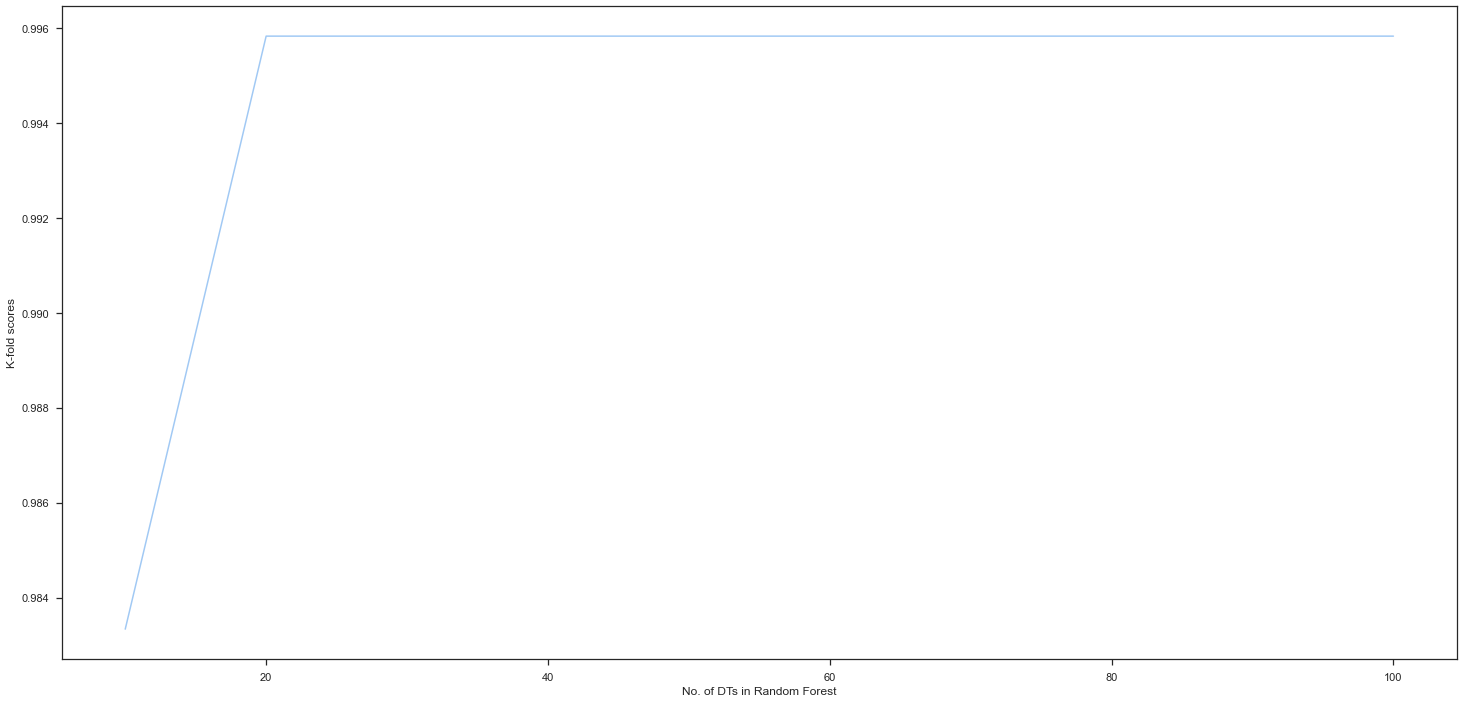

In [49]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Random Forest')
plt.ylabel('K-fold scores')
plt.show()

In [50]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [100,115,120],
            'max_depth': [12,13,14]
        }
grid_model4 = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=15)
grid_model4.fit(X,y)

GridSearchCV(cv=15, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [12, 13, 14],
                         'n_estimators': [100, 115, 120]})

In [51]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model4.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model4.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_rfo = grid_model4.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 12, 'n_estimators': 100}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9958333333333333
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 3 4 5 4 1 4 3 1 2]
[0 3 4 5 4 1 4 3 1 2]


In [52]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_rfo))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_rfo))

confusion_matrix RandomForest_opt      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [53]:
#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(1,100,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=5).mean())

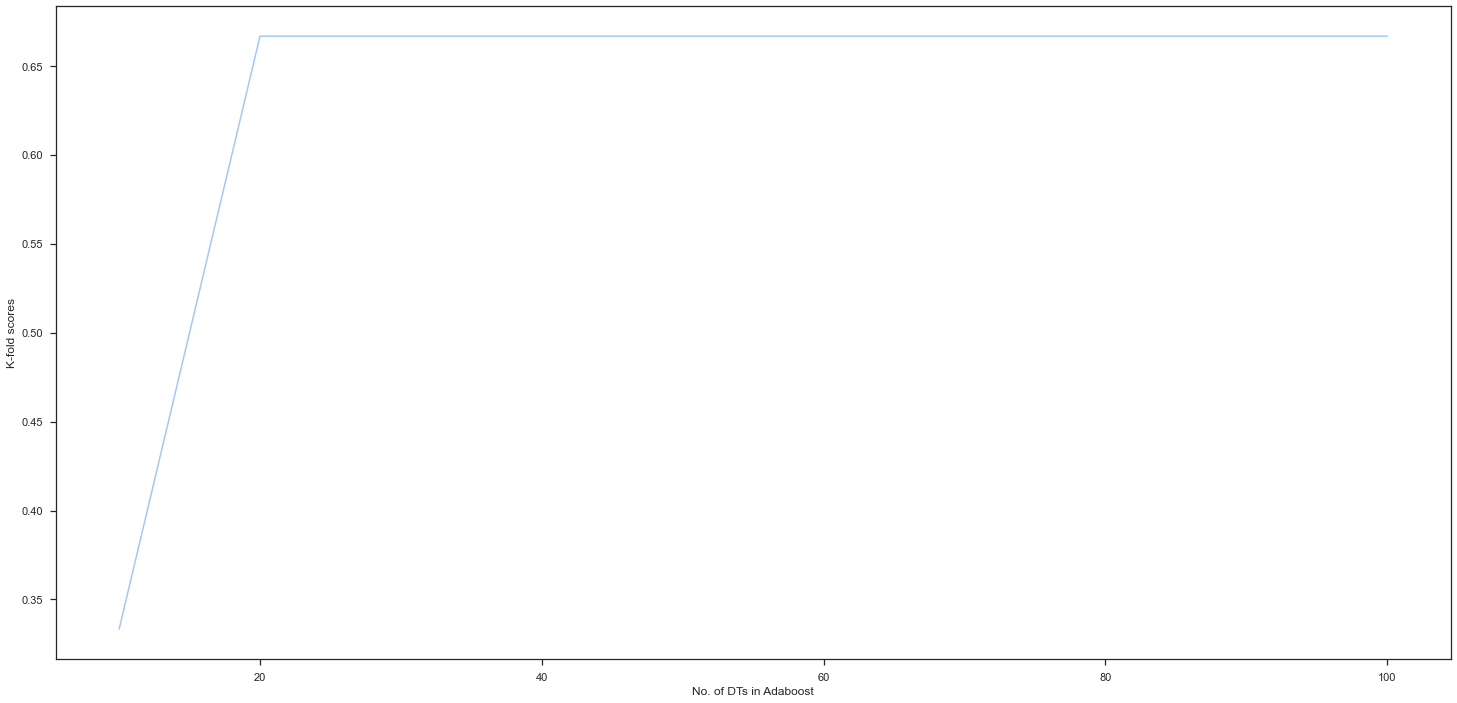

In [54]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [55]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [0.1,1,5,10],
            'base_estimator': [DecisionTreeClassifier(max_depth=13,random_state=0),
                               DecisionTreeClassifier(max_depth=14,random_state=0),
                               DecisionTreeClassifier(max_depth=16,random_state=0)]
        }
grid_model5 = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=15)
grid_model5.fit(X,y)

GridSearchCV(cv=15, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=13,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=14,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=16,
                                                                   random_state=0)],
                         'n_estimators': [0.1, 1, 5, 10]})

In [56]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model5.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model5.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_adab_o = grid_model5.best_estimator_.predict(X_test)
print(pred_adab_o[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeClassifier(max_depth=13, random_state=0), 'n_estimators': 1}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 1.0
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 3 4 5 4 1 4 3 1 2]
[0 3 4 5 4 1 4 3 1 2]


In [57]:
print('confusion_matrix  AdaBoost_opt      :\n', metrics.confusion_matrix(y_test, pred_adab_o))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost_opt :\n',metrics.classification_report(y_test, pred_adab_o))

confusion_matrix  AdaBoost_opt      :
 [[13  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
---------------------------------------------------------------------------------------------------------------------

classification_report AdaBoost_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### CONCLUSION
###############################################################################################################################

In [58]:
print('Display Accuracy, Recall and Precision For Classification Models')
print('--------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------------')
print('*********************************...........INFERENCE AND CONCLUSION.............**************************************')
print('-----------------------------------------------------------------------------------------------------------------------')
results_df= append_results("KNN", knn, results_df, y_test, pred_knn)
results_df= append_results("Logestic Regression", log_reg, results_df, y_test, pred_log)
results_df= append_results("SVC", svc, results_df, y_test, pred_svc)
results_df= append_results("Random Forest", rfc, results_df, y_test, pred_rfc)
results_df= append_results("Ada Boost", adab, results_df, y_test, pred_adab)
results_df= append_results("KNN_opt", grid_model, results_df, y_test, pred_knn_g)
results_df= append_results("LogesticRegression_opt", grid_model2, results_df, y_test, pred_log_g)
results_df= append_results("SVC_opt", grid_model3, results_df, y_test, pred_svc_g)
results_df= append_results("Random Forest_opt", grid_model4, results_df, y_test, pred_rfo)
results_df= append_results("Ada Boost_opt", grid_model5, results_df, y_test, pred_adab_o)
results_df

Display Accuracy, Recall and Precision For Classification Models
--------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------
*********************************...........INFERENCE AND CONCLUSION.............**************************************
-----------------------------------------------------------------------------------------------------------------------


,Model,Cross Val Score,pre_macro,recall_macro,f1_macro,f1_macro_manual
0,KNN,1.00,1.00,1.00,1.00,0.94
1,Logestic Regression,0.95,0.96,0.95,0.95,0.96
2,SVC,0.94,0.95,0.94,0.94,0.94
3,Random Forest,1.00,1.00,1.00,1.00,1.00
4,Ada Boost,0.73,0.83,0.76,0.76,0.67
5,KNN_opt,1.00,1.00,1.00,1.00,0.96
6,LogesticRegression_opt,0.83,0.81,0.78,0.78,0.81
7,SVC_opt,1.00,1.00,1.00,1.00,0.97
8,Random Forest_opt,1.00,1.00,1.00,1.00,1.00
9,Ada Boost_opt,1.00,1.00,1.00,1.00,1.00


#OPTIMIZED RANDOM FOREST AND ADA BOOST ARE THE BEST MODEL FIT WITH R2 AT 100%. CHOOSING RANDOM FOREST SEEMS MORE LOGICAL BECAUSE IT IS LESS COMPELICATED THAN ADABOOST.

#### Thank You!

In [59]:
!pip install yellowbrick

ValueError: num must be 1 <= num <= 2, not 3

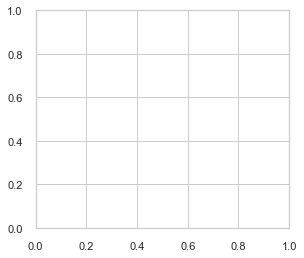

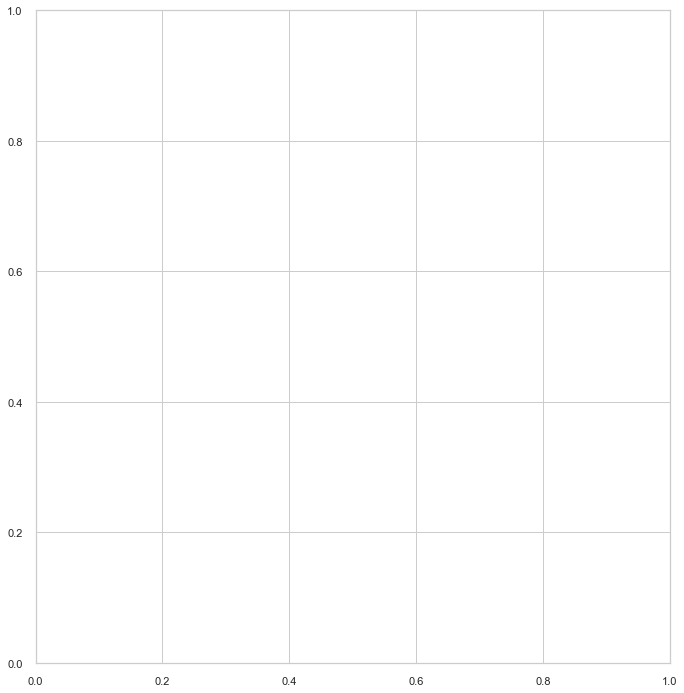

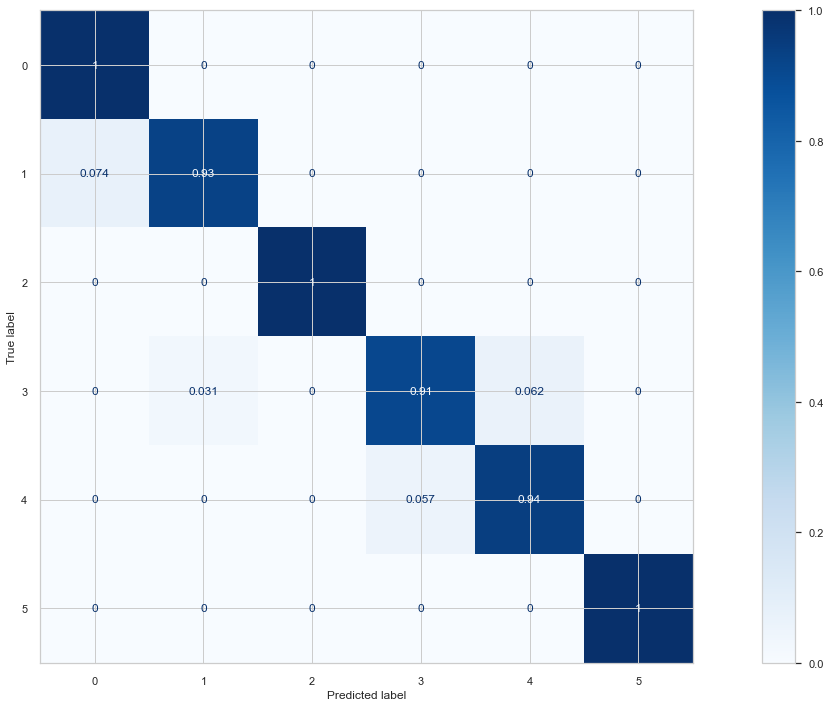

In [83]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
disp = plot_confusion_matrix(knn, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true');

plt.subplot(1,2,2)
disp = plot_confusion_matrix(log_reg, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true');
plt.subplot(1,2,3)
disp = plot_confusion_matrix(svc, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true');


plt.show();


TypeError: classification_report() got an unexpected keyword argument 'support'

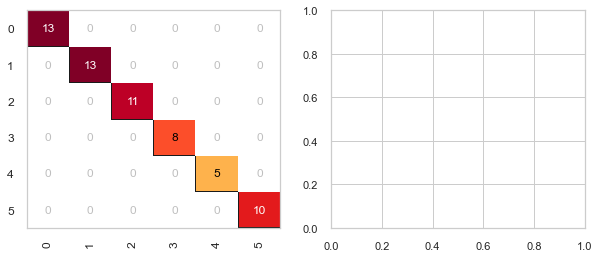

In [90]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=42),font_size=16 )
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

plt.subplot(1,2,2)
classification_report(RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test, support="percent",cmap="Reds");
                   
plt.show();

In [88]:
grid_model4.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'